In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('economic_index.csv')

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
# drop unneccessary columns
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [18]:
df1=df.copy()

In [20]:
df1.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [21]:
df1.drop(columns=['year','month'],axis=1,inplace=True)

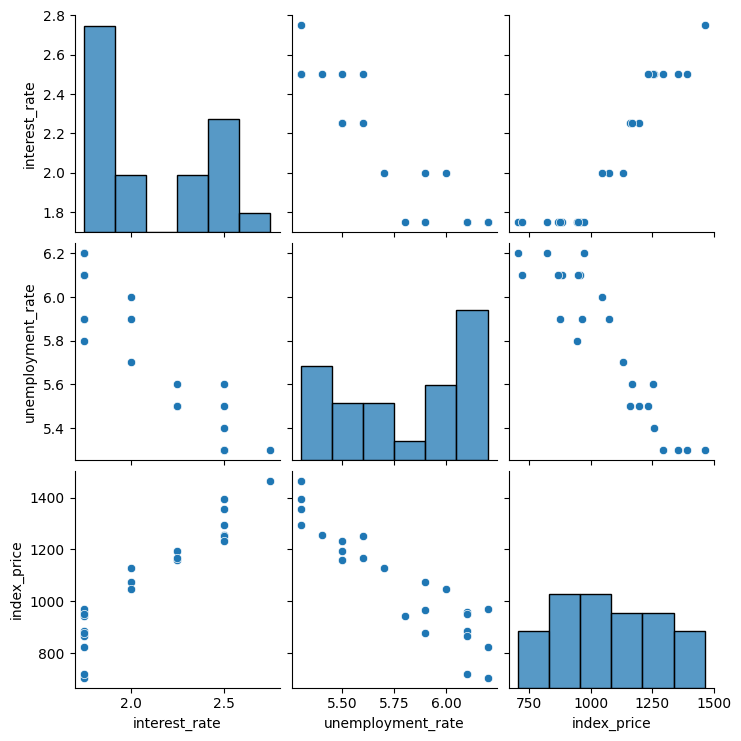

In [22]:
sns.pairplot(df1)

In [23]:
df1.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


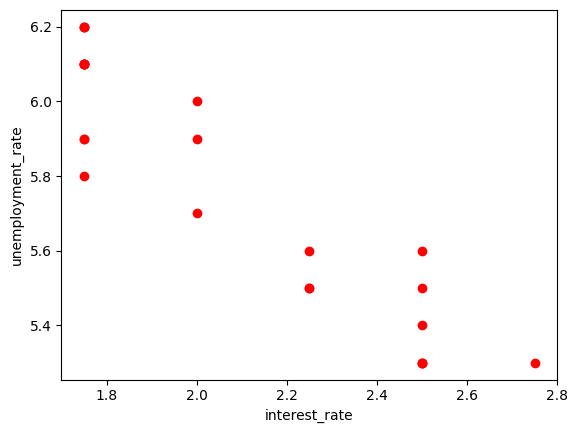

In [28]:
# visualiza the datapoints more closely
plt.scatter(df1['interest_rate'],df1['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.show()

In [35]:
# independent and dependent feature
X=df1.iloc[:,: -1]
y=df1.iloc[:,-1]

In [110]:
df1

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [64]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [107]:
len(X_test)

6

<Axes: xlabel='interest_rate', ylabel='index_price'>

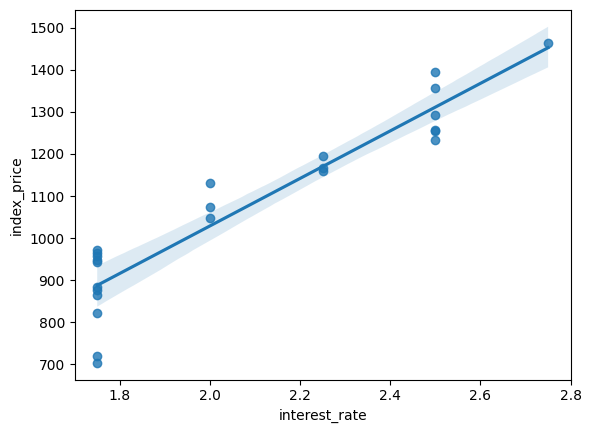

In [93]:
import seaborn as sns

# Assuming df1 is a DataFrame with 'interest_rate' and 'index_price' columns
sns.regplot(x='interest_rate', y='index_price', data=df1)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

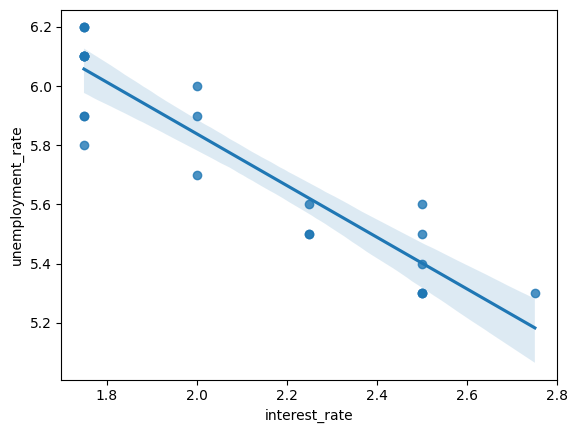

In [94]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df1)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

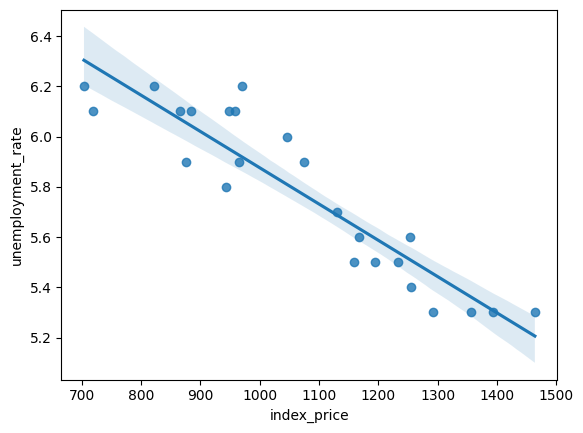

In [95]:
sns.regplot(x='index_price', y='unemployment_rate', data=df1)

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [113]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [114]:
regression.fit(X_train,y_train)

LinearRegression()

In [121]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)


In [122]:
np.mean(validation_score)

np.float64(-5914.82818016239)

In [129]:
y_pred=regression.predict(X_test)

In [130]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [131]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [133]:
from sklearn.metrics import r2_score

In [135]:
score=r2_score(y_test,y_pred)
print(score)

0.7591371539010254


In [137]:
1 - ( 1-score) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )

0.5985619231683756

# ASSUMPTION

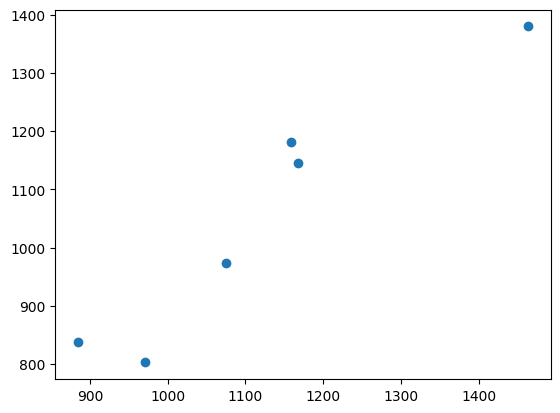

In [138]:
plt.scatter(y_test,y_pred)

In [145]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


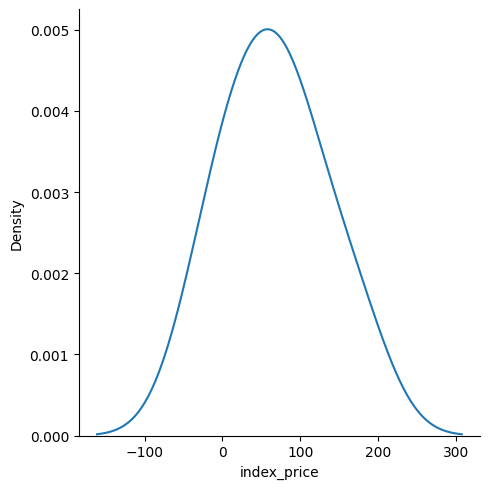

In [146]:
sns.displot(residuals,kind='kde')

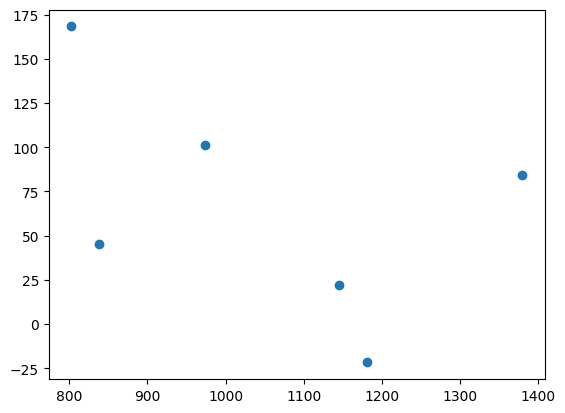

In [147]:
#scatter plot with respect to predictions and reciduals
plt.scatter(y_pred,residuals)

In [148]:
import statsmodels.api as sm

In [150]:
model=sm.OLS(y_train,X_train).fit()
model.predict(X_test)

array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [151]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 19 Sep 2024   Prob (F-statistic):                       0.754
Time:                        19:08:48   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [152]:
print(regression.coef_)

[  88.27275507 -116.25716066]
